In [38]:
import os
import numpy as np
from skimage.io import imread, imread_collection
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, Sequential
import matplotlib.pyplot as plt

SEED = 67
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
DATA_PATH = "../data"
TEST_PERCENT = .7
VAL_PERCENT = .15

np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:

dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_PATH,
    image_size=IMG_SIZE,
    seed=SEED,
    batch_size=BATCH_SIZE,
    shuffle=True
)

#Normalize the pixels
#dataset = dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))

#Split the datasets after loading in a shuffled version
total_batches = tf.data.experimental.cardinality(dataset).numpy()

train_size = int(TEST_PERCENT * total_batches)
val_size   = int(VAL_PERCENT * total_batches)
test_size  = total_batches - train_size - val_size

train_ds = dataset.take(train_size)
val_ds   = dataset.skip(train_size).take(val_size)
test_ds  = dataset.skip(train_size + val_size)


Found 5856 files belonging to 3 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

<h1>Visualize model training</h1>

In [60]:
def plot_training_curves(history, title_prefix="Model"):
    """Plot training & validation accuracy and loss (separate charts)."""
    # Accuracy plot
    plt.figure()
    plt.plot(history.history.get("accuracy", []), label="train_acc")
    if "val_accuracy" in history.history:
        plt.plot(history.history["val_accuracy"], label="val_acc")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # Loss plot
    plt.figure()
    plt.plot(history.history.get("loss", []), label="train_loss")
    if "val_loss" in history.history:
        plt.plot(history.history["val_loss"], label="val_loss")
    plt.title(f"{title_prefix} — Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

<h1>Simple CNN</h1>

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - accuracy: 0.6719 - loss: 46.6058 - val_accuracy: 0.7627 - val_loss: 0.5762
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - accuracy: 0.7961 - loss: 0.4862 - val_accuracy: 0.7465 - val_loss: 0.5772
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.8396 - loss: 0.3853 - val_accuracy: 0.7593 - val_loss: 0.5981
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.8767 - loss: 0.3014 - val_accuracy: 0.7986 - val_loss: 0.5846
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.9041 - loss: 0.2461 - val_accuracy: 0.7708 - val_loss: 0.7501
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.8777 - loss: 0.3171 - val_accuracy: 0.7847 - val_loss: 0.7096
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.9070 - loss: 0.2411 - val_accuracy: 0.8021 - val_loss: 0.7933
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.9456 - loss: 

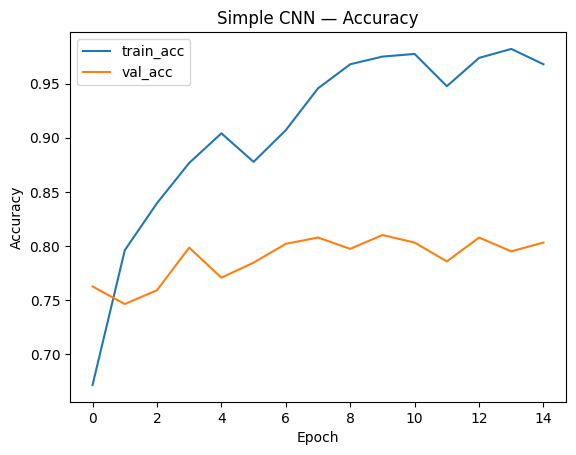

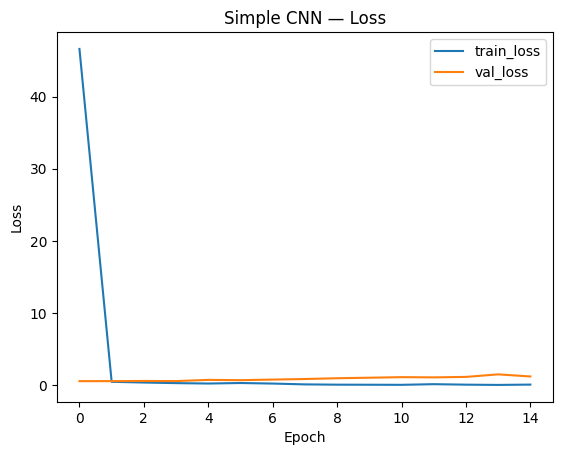

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,228,256 (96.24 MB)

 Trainable params: 8,409,418 (32.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,818,838 (64.16 MB)

In [61]:
cnn_simple = Sequential([
    layers.Input(shape=(IMG_SIZE + (3,))),
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

cnn_simple.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


history_cnn_simple = cnn_simple.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    verbose=1
)

plot_training_curves(history_cnn_simple, title_prefix="Simple CNN")
cnn_simple.summary()